## Lession 7: Multiplex and temporal networks

We will analyse and explore multiplex and temporal networks in this session. <br>

Networkx does not support representation and analysis of multiplex and temporal networks. Thus, we have to be creative.

There are several python packages developed by scientists for multiplex network analysis which you can use: 
    - Multinetx https://github.com/nkoub/multinetx
    - Multiplex https://nicholasmamo.github.io/multiplex-plot/index.html
    - Pymnet http://www.mkivela.com/pymnet/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In ../data/ repository you have two multiplex networks: 
    - ../data/cs_relationships/ Multiplex network consisting of 5 edge types corresponding to online and offline relationships (Facebook, leisure, work, co-authorship, lunch) between employees of the Computer Science department at Aarhus
    - ../data/london_transport/ Multiplex network with 3 edge types representing links within the three layers of London train stations: Underground, Overground and DLR
    
    

### London transport network.

In [4]:
nodesLT=pd.read_csv("../data/london_transport/nodes.csv")

In [5]:
nodesLT.head()

,# index,name,nodeLabel,nodeLat,nodeLong,_pos
0,0,abbeyroad,abbeyroad,51.531952,0.003738,"array([1.67398194, 6.84895367])"
1,1,westham,westham,51.528526,0.005332,"array([1.69016166, 6.8574384 ])"
2,2,actoncentral,actoncentral,51.508758,-0.263416,"array([1.92309925, 7.34721208])"
3,3,willesdenjunction,willesdenjunction,51.532234,-0.243895,"array([1.89444118, 7.329156 ])"
4,4,actontown,actontown,51.503071,-0.280288,"array([2.03649598, 7.40223207])"


In [6]:
edgesLT=pd.read_csv("../data/london_transport/edges.csv")

In [7]:
edgesLT.head()

,# source,target,weight,layer
0,0,1,1,3
1,0,352,1,3
2,1,77,2,1
3,1,106,1,1
4,1,219,1,1


We have three types of transportation or three layers: Tube - 1, Overground - 2, DLR - 3

We will use a nx.MultiGraph() for storing this data.
    
For now we will disregard the weights. 

In [8]:
G= nx.from_pandas_edgelist(edgesLT, '# source', ' target', edge_attr=[' layer'], 
                                 create_using=nx.MultiGraph())

In [9]:
G.edges(data=True)

MultiEdgeDataView([(0, 1, {' layer': 3}), (0, 352, {' layer': 3}), (1, 77, {' layer': 1}), (1, 106, {' layer': 1}), (1, 219, {' layer': 1}), (1, 321, {' layer': 1}), (1, 347, {' layer': 3}), (352, 219, {' layer': 3}), (77, 76, {' layer': 1}), (106, 66, {' layer': 3}), (106, 105, {' layer': 1}), (106, 107, {' layer': 3}), (106, 108, {' layer': 3}), (106, 347, {' layer': 3}), (219, 59, {' layer': 1}), (219, 218, {' layer': 2}), (219, 282, {' layer': 1}), (219, 326, {' layer': 3}), (219, 353, {' layer': 3}), (321, 322, {' layer': 1}), (2, 3, {' layer': 2}), (2, 216, {' layer': 2}), (3, 224, {' layer': 1}), (3, 224, {' layer': 2}), (3, 258, {' layer': 1}), (3, 258, {' layer': 2}), (3, 260, {' layer': 2}), (3, 338, {' layer': 2}), (216, 215, {' layer': 2}), (224, 225, {' layer': 1}), (224, 225, {' layer': 2}), (258, 259, {' layer': 1}), (258, 259, {' layer': 2}), (260, 87, {' layer': 2}), (338, 164, {' layer': 1}), (338, 246, {' layer': 1}), (338, 261, {' layer': 2}), (4, 5, {' layer': 1}),

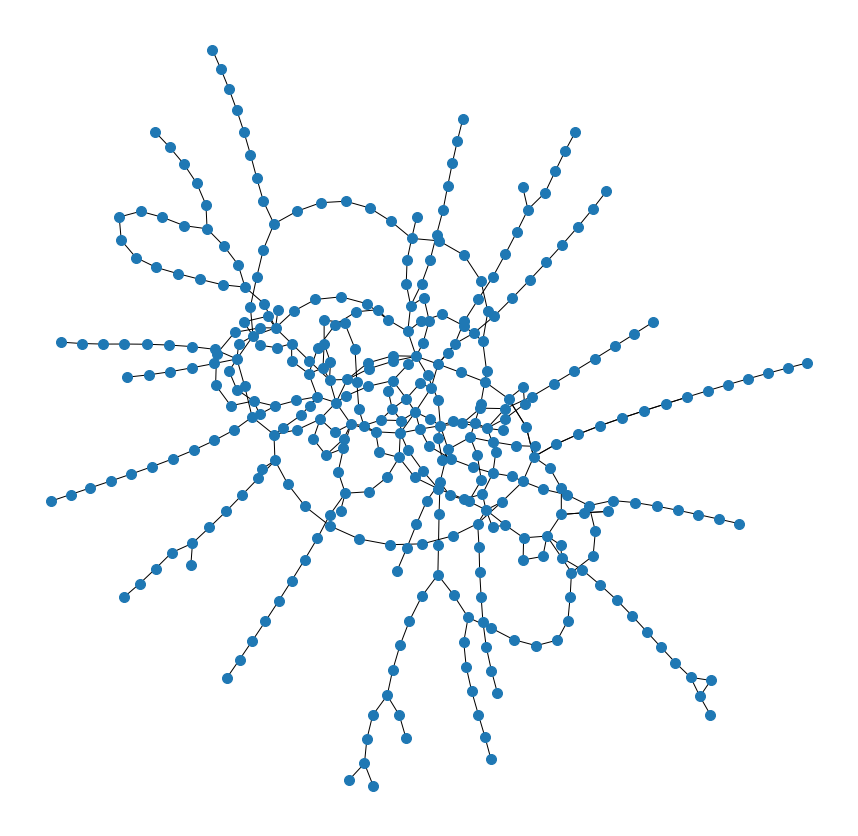

In [10]:
plt.figure(figsize =(15, 15))
posG=nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos=posG, node_size=100)
nx.draw_networkx_edges(G,pos=posG)
plt.box(False)
plt.show()

In [11]:
G.number_of_nodes()

369

In [12]:
G.number_of_edges()

441

In [13]:
G.edges.data(" layer")

MultiEdgeDataView([(0, 1, 3), (0, 352, 3), (1, 77, 1), (1, 106, 1), (1, 219, 1), (1, 321, 1), (1, 347, 3), (352, 219, 3), (77, 76, 1), (106, 66, 3), (106, 105, 1), (106, 107, 3), (106, 108, 3), (106, 347, 3), (219, 59, 1), (219, 218, 2), (219, 282, 1), (219, 326, 3), (219, 353, 3), (321, 322, 1), (2, 3, 2), (2, 216, 2), (3, 224, 1), (3, 224, 2), (3, 258, 1), (3, 258, 2), (3, 260, 2), (3, 338, 2), (216, 215, 2), (224, 225, 1), (224, 225, 2), (258, 259, 1), (258, 259, 2), (260, 87, 2), (338, 164, 1), (338, 246, 1), (338, 261, 2), (4, 5, 1), (4, 6, 1), (4, 160, 1), (4, 301, 1), (5, 6, 1), (6, 215, 1), (6, 221, 1), (6, 345, 1), (160, 159, 1), (160, 300, 1), (301, 72, 1), (215, 264, 1), (215, 264, 2), (221, 44, 1), (221, 328, 1), (345, 328, 1), (7, 8, 1), (7, 295, 1), (8, 9, 1), (8, 34, 1), (8, 39, 1), (8, 58, 1), (295, 9, 1), (295, 110, 1), (9, 10, 1), (34, 35, 1), (34, 39, 1), (34, 119, 1), (34, 180, 1), (34, 36, 3), (39, 20, 1), (39, 37, 1), (58, 59, 1), (10, 348, 1), (10, 36, 2), (10, 2

In [14]:
s=nx.get_edge_attributes(G, " layer")
s

{(0, 1, 0): 3,
 (0, 352, 0): 3,
 (1, 77, 0): 1,
 (1, 106, 0): 1,
 (1, 219, 0): 1,
 (1, 321, 0): 1,
 (1, 347, 0): 3,
 (352, 219, 0): 3,
 (77, 76, 0): 1,
 (106, 66, 0): 3,
 (106, 105, 0): 1,
 (106, 107, 0): 3,
 (106, 108, 0): 3,
 (106, 347, 0): 3,
 (219, 59, 0): 1,
 (219, 218, 0): 2,
 (219, 282, 0): 1,
 (219, 326, 0): 3,
 (219, 353, 0): 3,
 (321, 322, 0): 1,
 (2, 3, 0): 2,
 (2, 216, 0): 2,
 (3, 224, 0): 1,
 (3, 224, 1): 2,
 (3, 258, 0): 1,
 (3, 258, 1): 2,
 (3, 260, 0): 2,
 (3, 338, 0): 2,
 (216, 215, 0): 2,
 (224, 225, 0): 1,
 (224, 225, 1): 2,
 (258, 259, 0): 1,
 (258, 259, 1): 2,
 (260, 87, 0): 2,
 (338, 164, 0): 1,
 (338, 246, 0): 1,
 (338, 261, 0): 2,
 (4, 5, 0): 1,
 (4, 6, 0): 1,
 (4, 160, 0): 1,
 (4, 301, 0): 1,
 (5, 6, 0): 1,
 (6, 215, 0): 1,
 (6, 221, 0): 1,
 (6, 345, 0): 1,
 (160, 159, 0): 1,
 (160, 300, 0): 1,
 (301, 72, 0): 1,
 (215, 264, 0): 1,
 (215, 264, 1): 2,
 (221, 44, 0): 1,
 (221, 328, 0): 1,
 (345, 328, 0): 1,
 (7, 8, 0): 1,
 (7, 295, 0): 1,
 (8, 9, 0): 1,
 (8, 34, 0

In [15]:
s[224, 225, 0]

1

In [16]:
s[224, 225, 1]

2

In [17]:
s[0,1,0]

3

In [18]:
s[0,1,1]

KeyError: (0, 1, 1)

Number of edges in each layer
        

In [22]:
for u,v,a in G.edges(data=True):
    print(u,v,a[' layer'])

0 1 3
0 352 3
1 77 1
1 106 1
1 219 1
1 321 1
1 347 3
352 219 3
77 76 1
106 66 3
106 105 1
106 107 3
106 108 3
106 347 3
219 59 1
219 218 2
219 282 1
219 326 3
219 353 3
321 322 1
2 3 2
2 216 2
3 224 1
3 224 2
3 258 1
3 258 2
3 260 2
3 338 2
216 215 2
224 225 1
224 225 2
258 259 1
258 259 2
260 87 2
338 164 1
338 246 1
338 261 2
4 5 1
4 6 1
4 160 1
4 301 1
5 6 1
6 215 1
6 221 1
6 345 1
160 159 1
160 300 1
301 72 1
215 264 1
215 264 2
221 44 1
221 328 1
345 328 1
7 8 1
7 295 1
8 9 1
8 34 1
8 39 1
8 58 1
295 9 1
295 110 1
9 10 1
34 35 1
34 39 1
34 119 1
34 180 1
34 36 3
39 20 1
39 37 1
58 59 1
10 348 1
10 36 2
10 251 2
348 59 1
36 337 2
36 289 3
36 360 3
251 220 2
11 12 3
11 156 3
12 65 3
12 290 3
12 324 3
156 75 3
65 66 3
290 289 3
290 324 3
324 102 3
13 14 1
13 354 1
14 300 1
354 342 1
15 16 1
16 117 1
16 122 1
117 125 1
17 18 2
17 318 2
18 309 2
318 194 2
19 20 1
19 181 1
181 38 1
181 94 1
181 97 1
181 100 1
181 184 1
181 245 1
21 22 1
21 169 1
22 262 1
169 168 1
262 99 1
23 24 1
23 73

In [23]:
L1=0
L2=0
L3=0
for u,v,a in G.edges(data=True):
    if a[' layer']==1:
        L1+=1
    if a[' layer']==2:
        L2+=1
    if a[' layer']==3:
        L3+=1
print(L1,L2,L3)    

312 83 46


Overlaping edges

In [24]:
L12=0
L13=0
L23=0
L1=0
L2=0
L3=0
for u,v,a in G.edges(data=True):
    if ((u,v,0) in s.keys()):
        if (u,v,1) in s.keys(): 
            if s[u,v,0]==1 and s[u,v,1]==2:
                L12+=1
            if s[u,v,1]==1 and s[u,v,0]==2:
                L12+=1
            if s[u,v,0]==2 and s[u,v,1]==3:
                L23+=1
            if s[u,v,1]==3 and s[u,v,0]==1:
                L23+=1
            if s[u,v,0]==1 and s[u,v,1]==3:
                L13+=1
            if s[u,v,1]==3 and s[u,v,0]==1:
                L13+=1
        if (u,v,2) in s.keys():
            if s[u,v,0]==1 and s[u,v,2]==2:
                L12+=1
            if s[u,v,2]==1 and s[u,v,0]==2:
                L12+=1
            if s[u,v,0]==2 and s[u,v,2]==3:
                L23+=1
            if s[u,v,2]==3 and s[u,v,0]==1:
                L23+=1
            if s[u,v,0]==2 and s[u,v,2]==3:
                L13+=1
            if s[u,v,1]==3 and s[u,v,0]==1:
                L13+=1
            if s[u,v,1]==1 and s[u,v,2]==2:
                L12+=1
            if s[u,v,2]==1 and s[u,v,1]==2:
                L12+=1
            if s[u,v,1]==2 and s[u,v,2]==3:
                L23+=1
            if s[u,v,2]==3 and s[u,v,1]==1:
                L23+=1
            if s[u,v,1]==2 and s[u,v,2]==3:
                L13+=1
            if s[u,v,1]==3 and s[u,v,1]==1:
                L13+=1    
print(int(L12/2),int(L13/2),int(L23/2))    

11 0 0


Project networks or separate layers into separate networks

In [26]:
G_ltu=nx.Graph()
G_lto=nx.Graph()
G_ltdlr=nx.Graph()
for u in G.nodes():
    G_ltu.add_node(u)
    G_lto.add_node(u)
    G_ltdlr.add_node(u)
for u,v,a in G.edges(data=True):
    if a[' layer']==1:
        G_ltu.add_edge(u,v)
    if a[' layer']==2:
        G_lto.add_edge(u,v)
    if a[' layer']==3:
        G_ltdlr.add_edge(u,v)    

In [27]:
print("Underground:", nx.number_of_nodes(G_ltu), nx.number_of_edges(G_ltu))
print("Overground:", nx.number_of_nodes(G_lto), nx.number_of_edges(G_lto))
print("DLR:", nx.number_of_nodes(G_ltdlr), nx.number_of_edges(G_ltdlr))

Underground: 369 312
Overground: 369 83
DLR: 369 46


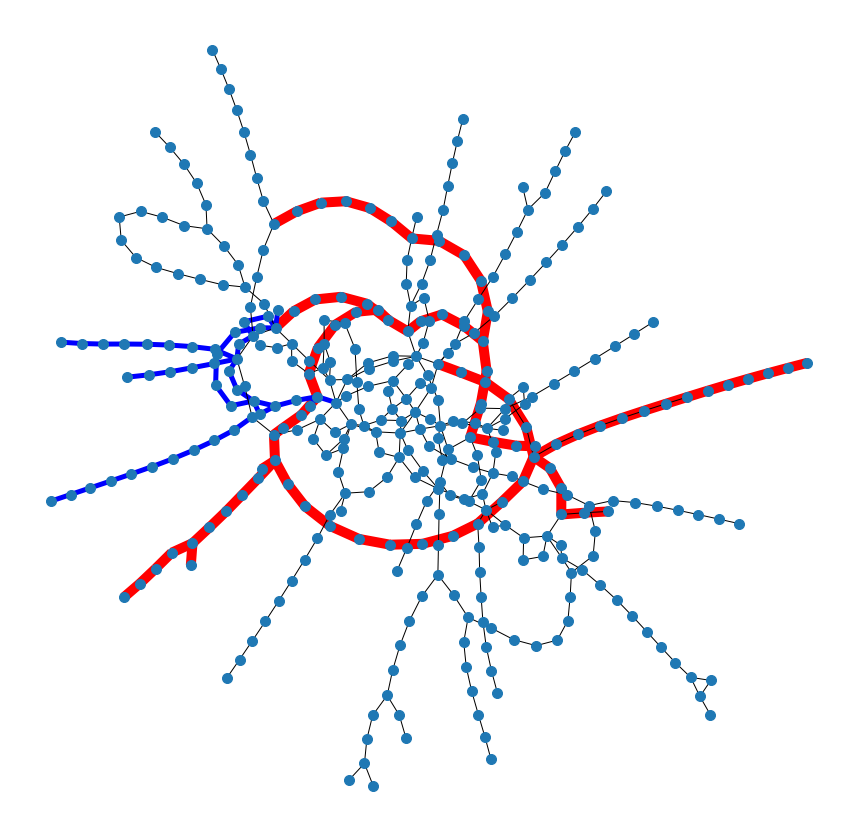

In [28]:
plt.figure(figsize =(15, 15))
nx.draw_networkx_nodes(G, pos=posG, node_size=100)
nx.draw_networkx_edges(G_lto,pos=posG, edge_color="red", width=10)
nx.draw_networkx_edges(G_ltdlr,pos=posG, edge_color="blue", width=5)
nx.draw_networkx_edges(G_ltu,pos=posG, edge_color="black", width=1)
plt.box(False)
plt.show()

Average shortest path in the whole network

In [24]:
lG=nx.average_shortest_path_length(G)
lG

13.732738305643926

Avreage shortest path in each layer

In [29]:
lGu=nx.average_shortest_path_length(G_ltu)
lGo=nx.average_shortest_path_length(G_lto)
lGdlr=nx.average_shortest_path_length(G_ltdlr)
print(lGu,lGo,lGdlr)

NetworkXError: Graph is not connected.

Our layers are not connected, thus we need to work with connected components

In [30]:
[len(c) for c in sorted(nx.connected_components(G_ltu), key=len, reverse=True)]

[271,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [32]:
CC_Gu=G_ltu.subgraph(max(nx.connected_components(G_ltu), key=len))
CC_Go=G_lto.subgraph(max(nx.connected_components(G_lto), key=len))
CC_Gdlr=G_ltdlr.subgraph(max(nx.connected_components(G_ltdlr), key=len))

In [34]:
lGu=nx.average_shortest_path_length(CC_Gu)
lGo=nx.average_shortest_path_length(CC_Go)
lGdlr=nx.average_shortest_path_length(CC_Gdlr)
print(lGu,lGo,lGdlr)
print(nx.number_of_nodes(CC_Gu),nx.number_of_nodes(CC_Go),nx.number_of_nodes(CC_Gdlr))

13.963318299849664 13.485747869526888 8.232323232323232
271 83 45


In [35]:
nx.diameter(G)

39

In [36]:
dGu=nx.diameter(CC_Gu)
dGo=nx.diameter(CC_Go)
dGdlr=nx.diameter(CC_Gdlr)
print(dGu,dGo,dGdlr)

39 35 23


Total degree of a node and degree distribution

In [37]:
qG={}
for n, d in G.degree():
    qG[n]=d
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
dmax

7

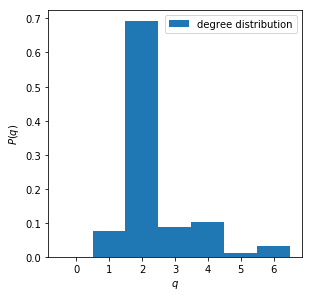

In [38]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.xlabel("$q$")
plt.ylabel('$P(q)$')
plt.hist([v for v in degree_sequence], bins=[0,1,2,3,4,5,6,7], density=True, histtype='bar',align='left',label="degree distribution")
plt.legend()
plt.show()

Degree of a node in each layer

In [39]:
qGu={}
for n, d in G_ltu.degree():
    qGu[n]=d
DSu = sorted((d for n, d in G_ltu.degree()), reverse=True)
dmax = max(DSu)
dmax

7

In [40]:
qGo={}
for n, d in G_lto.degree():
    qGo[n]=d
DSo = sorted((d for n, d in G_lto.degree()), reverse=True)
dmax = max(DSo)
dmax

5

In [41]:
qGdlr={}
for n, d in G_ltdlr.degree():
    qGdlr[n]=d
DSdlr = sorted((d for n, d in G_ltdlr.degree()), reverse=True)
dmax = max(DSo)
dmax

5

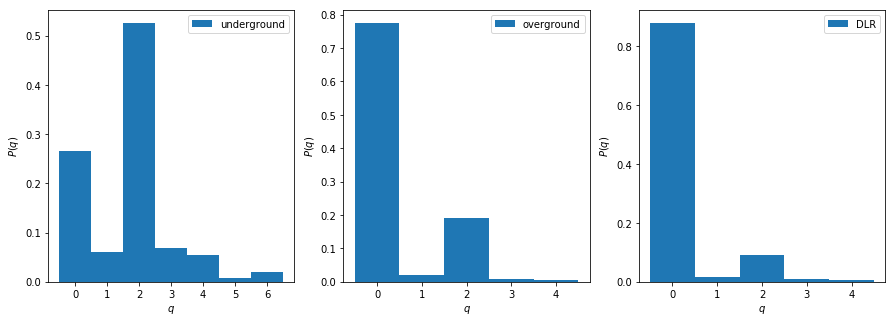

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.xlabel("$q$")
plt.ylabel('$P(q)$')
plt.hist([v for v in DSu], bins=[0,1,2,3,4,5,6,7], density=True, histtype='bar',align='left',label="underground")
plt.legend()

plt.subplot(1,3,2)
plt.xlabel("$q$")
plt.ylabel('$P(q)$')
plt.hist([v for v in DSo], bins=[0,1,2,3,4,5], density=True, histtype='bar',align='left',label="overground")
plt.legend()

plt.subplot(1,3,3)
plt.xlabel("$q$")
plt.ylabel('$P(q)$')
plt.hist([v for v in DSdlr], bins=[0,1,2,3,4,5], density=True, histtype='bar',align='left',label="DLR")
plt.legend()

plt.show()

Correlations between degrees

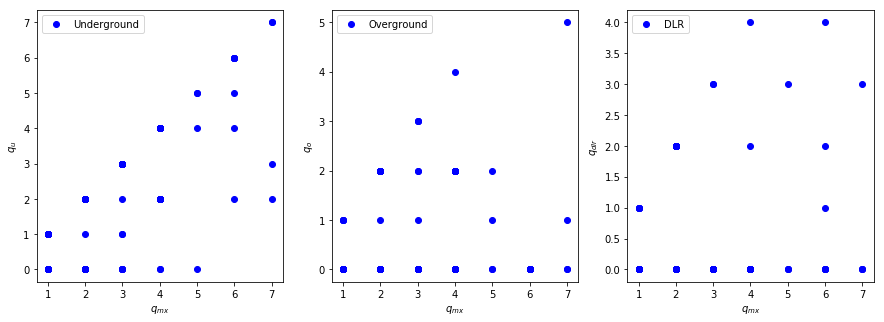

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.xlabel("$q_{mx}$")
plt.ylabel('$q_{u}$')
plt.plot([x for x in qG.values()],[y for y in qGu.values()], 'o', color="b", label="Underground")
plt.legend()

plt.subplot(1,3,2)
plt.xlabel("$q_{mx}$")
plt.ylabel('$q_{o}$')
plt.plot([x for x in qG.values()],[y for y in qGo.values()], 'o', color="b", label="Overground")
plt.legend()

plt.subplot(1,3,3)
plt.xlabel("$q_{mx}$")
plt.ylabel('$q_{dlr}$')
plt.plot([x for x in qG.values()],[y for y in qGdlr.values()], 'o', color="b", label="DLR")
plt.legend()

plt.show()



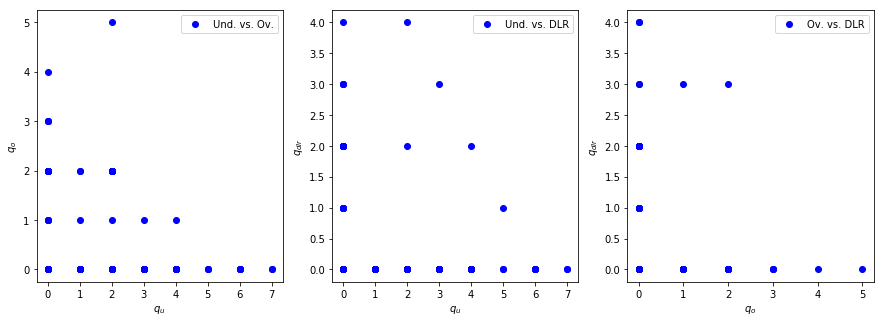

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.xlabel("$q_{u}$")
plt.ylabel('$q_{o}$')
plt.plot([x for x in qGu.values()],[y for y in qGo.values()], 'o', color="b", label="Und. vs. Ov.")
plt.legend()

plt.subplot(1,3,2)
plt.xlabel("$q_{u}$")
plt.ylabel('$q_{dlr}$')
plt.plot([x for x in qGu.values()],[y for y in qGdlr.values()], 'o', color="b", label="Und. vs. DLR")
plt.legend()

plt.subplot(1,3,3)
plt.xlabel("$q_{o}$")
plt.ylabel('$q_{dlr}$')
plt.plot([x for x in qGo.values()],[y for y in qGdlr.values()], 'o', color="b", label="Ov. vs. DLR")
plt.legend()

plt.show()


Correlation matrix

In [45]:
a=[v for v in qG.values()]
b=[v for v in qGu.values()]
c=[v for v in qGo.values()]
d=[v for v in qGdlr.values()]
Cab=np.corrcoef(a,b)
Cac=np.corrcoef(a,c)
Cad=np.corrcoef(a,d)
Cbc=np.corrcoef(b,c)
Cbd=np.corrcoef(b,d)
Ccd=np.corrcoef(c,d)
C=np.array([[1,0,0,0],[np.around(Cab[0][1],2),1,0,0],[np.around(Cac[0][1],2),np.around(Cbc[0][1],2),1,0],[np.around(Cad[0][1],2),np.around(Cbd[0][1],2),np.around(Ccd[0][1],2),1]])


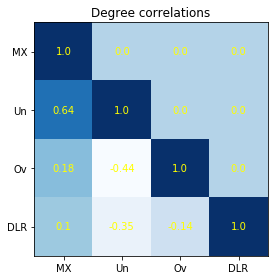

In [46]:
cc=['MX','Un','Ov','DLR']
fig, ax = plt.subplots()
im = ax.imshow(C, cmap="Blues")
ax.set_xticks(np.arange(len(cc)))
ax.set_yticks(np.arange(len(cc)))
ax.set_xticklabels(cc)
ax.set_yticklabels(cc)
for i in range(len(cc)):
    for j in range(len(cc)):
        text = ax.text(j, i, C[i, j],
                       ha="center", va="center", color="Yellow")

ax.set_title("Degree correlations")
fig.tight_layout()
plt.show()
#fig.savefig("centrality_correlations.png")
plt.show()

### Computer Science department at Aarhus

- ./data/cs_relationships/ Multiplex network consisting of 5 edge types corresponding to online and offline relationships (Facebook, leisure, work, co-authorship, lunch) between employees of the Computer Science department at Aarhus

In [47]:
nodesCS=pd.read_csv("../data/cs_relationships/nodes.csv")

In [48]:
edgesCS=pd.read_csv("../data/cs_relationships/edges.csv")

In [49]:
edgesCS.head()

,# source,target,weight,layer
0,0,1,1,1
1,0,2,1,1
2,1,10,1,5
3,1,11,1,5
4,1,17,1,5


1: 'lunch', 2: 'facebook', 3: 'coauthor', 4: 'leisure', 5: 'work'

In [50]:
CS= nx.from_pandas_edgelist(edgesCS, '# source', ' target', edge_attr=[' layer'], 
                                 create_using=nx.MultiGraph())

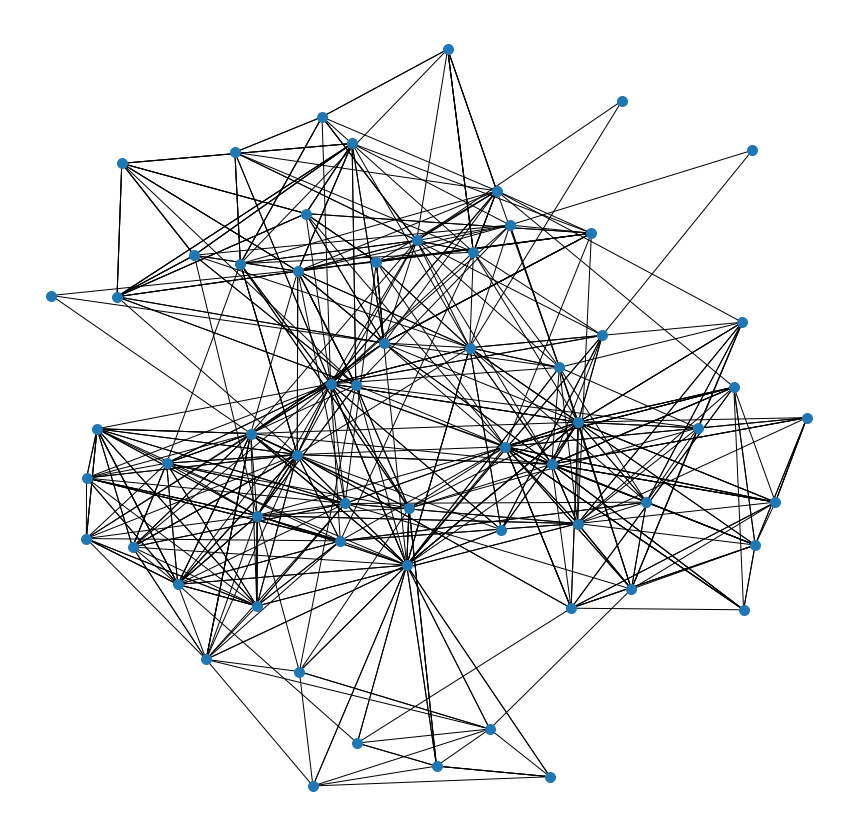

In [51]:
plt.figure(figsize =(15, 15))
posCS=nx.kamada_kawai_layout(CS)
nx.draw_networkx_nodes(CS, pos=posCS, node_size=100)
nx.draw_networkx_edges(CS,pos=posCS)
plt.box(False)
plt.show()

How many nodes and links this network has?

In [52]:
CSl=nx.Graph()
CSfb=nx.Graph()
CSca=nx.Graph()
CSls=nx.Graph()
CSw=nx.Graph()
for u in CS.nodes():
    CSl.add_node(u)
    CSfb.add_node(u)
    CSca.add_node(u)
    CSls.add_node(u)
    CSw.add_node(u)
nx.number_of_nodes(CSfb)

61

In [53]:
for u,v,a in CS.edges(data=True):
    if a[' layer']==1:
        CSl.add_edge(u,v)
    if a[' layer']==2:
        CSfb.add_edge(u,v)
    if a[' layer']==3:
        CSca.add_edge(u,v)
    if a[' layer']==4:
        CSls.add_edge(u,v)
    if a[' layer']==5:
        CSw.add_edge(u,v)

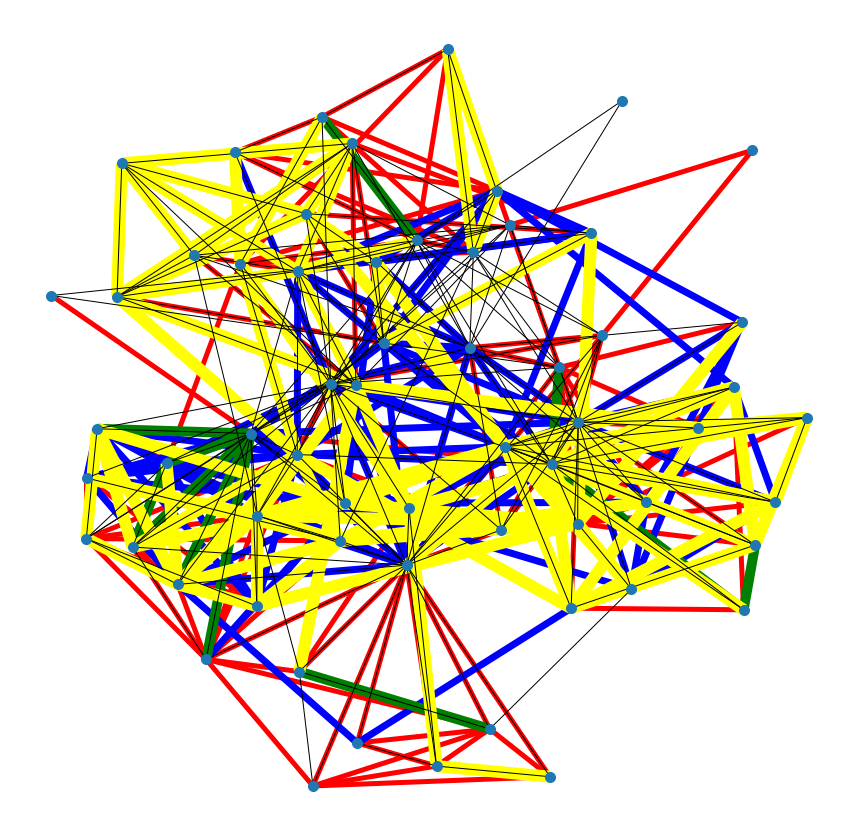

In [54]:
plt.figure(figsize =(15, 15))
nx.draw_networkx_nodes(CS, pos=posCS, node_size=100)
nx.draw_networkx_edges(CSl,pos=posCS, edge_color="red", width=5)
nx.draw_networkx_edges(CSfb,pos=posCS, edge_color="blue", width=7)
nx.draw_networkx_edges(CSca,pos=posCS, edge_color="green", width=10)
nx.draw_networkx_edges(CSls,pos=posCS, edge_color="yellow", width=12)
nx.draw_networkx_edges(CSw,pos=posCS, edge_color="black", width=1)
plt.box(False)
plt.show()

Work versus lunch relationships

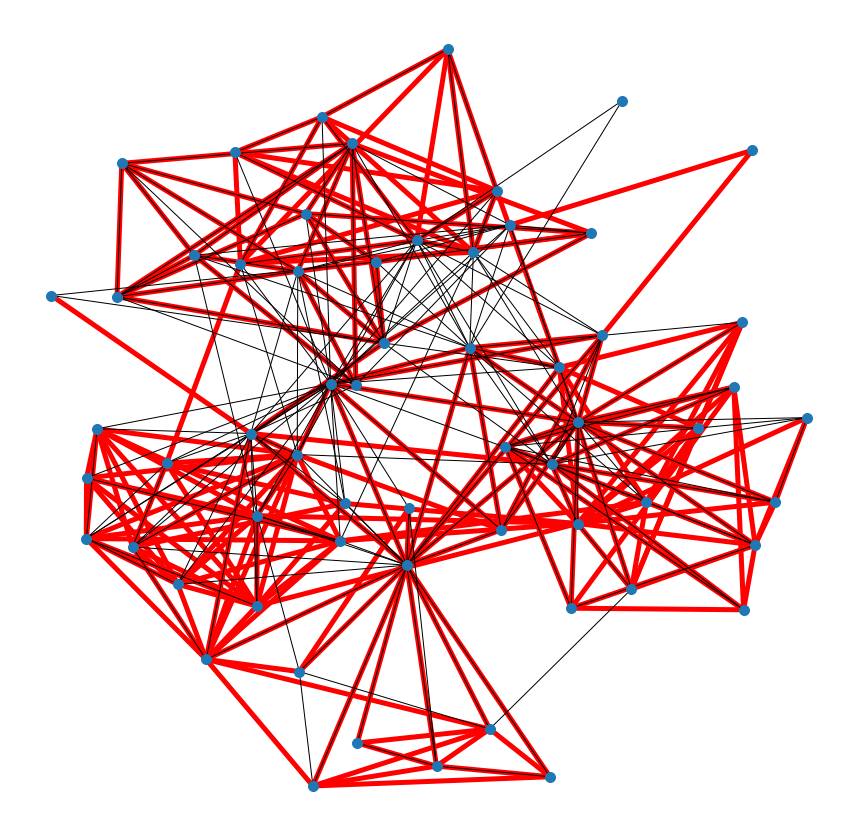

In [55]:
plt.figure(figsize =(15, 15))
nx.draw_networkx_nodes(CS, pos=posCS, node_size=100)
nx.draw_networkx_edges(CSl,pos=posCS, edge_color="red", width=5)
nx.draw_networkx_edges(CSw,pos=posCS, edge_color="black", width=1)
plt.box(False)
plt.show()

Work versus FB

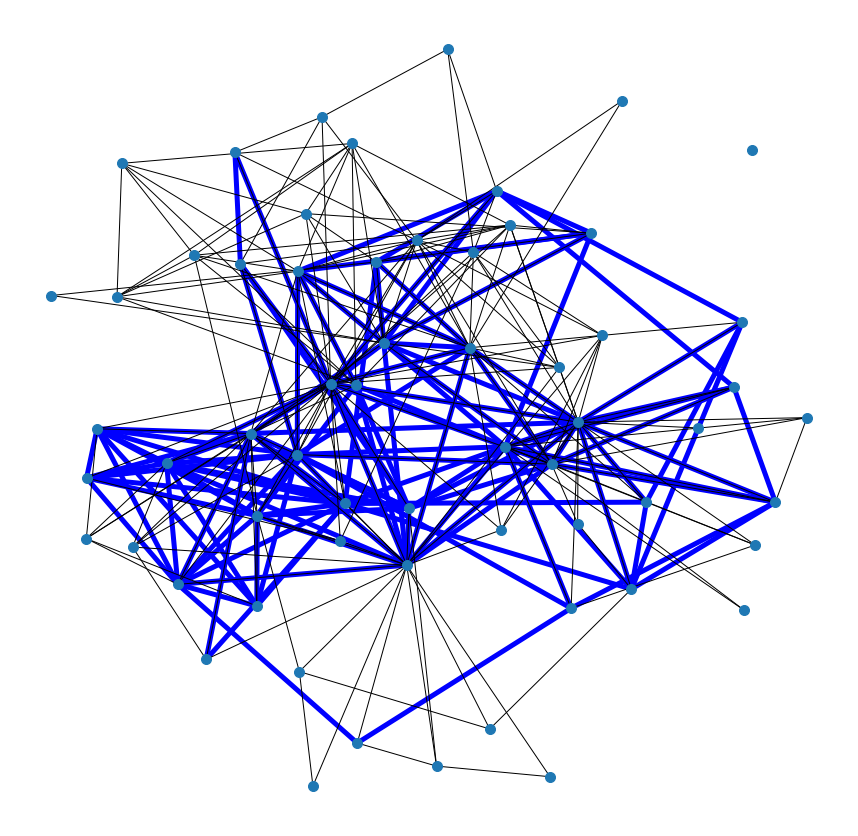

In [56]:
plt.figure(figsize =(15, 15))
nx.draw_networkx_nodes(CS, pos=posCS, node_size=100)
nx.draw_networkx_edges(CSfb,pos=posCS, edge_color="blue", width=5)
nx.draw_networkx_edges(CSw,pos=posCS, edge_color="black", width=1)
plt.box(False)
plt.show()

Work versus coauthorship

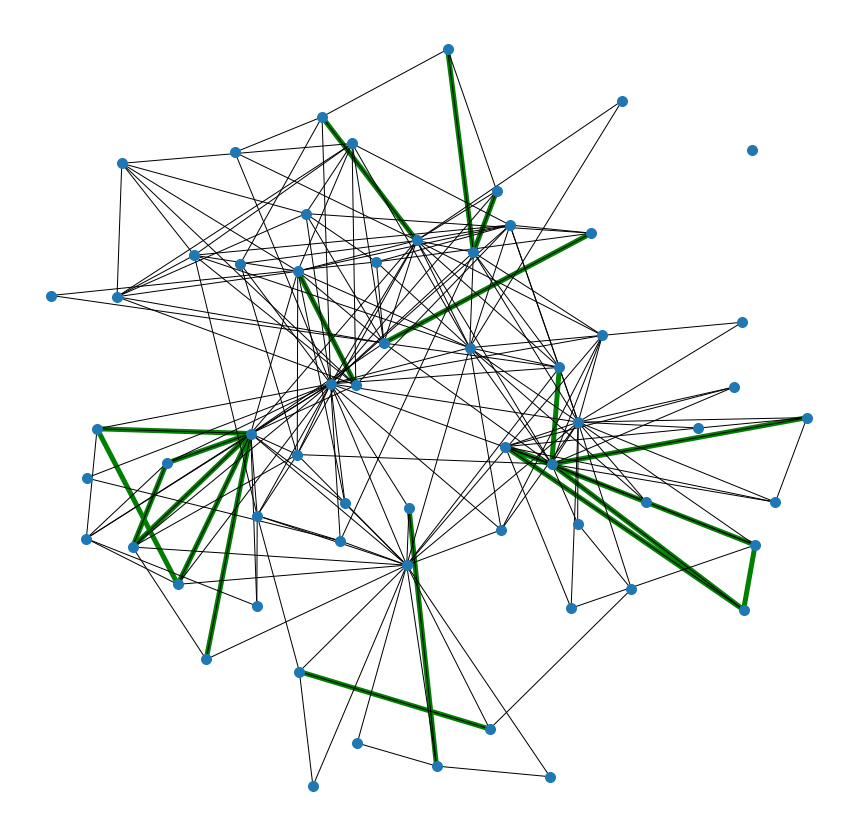

In [51]:
plt.figure(figsize =(15, 15))
nx.draw_networkx_nodes(CS, pos=posCS, node_size=100)
nx.draw_networkx_edges(CSca,pos=posCS, edge_color="green", width=5)
nx.draw_networkx_edges(CSw,pos=posCS, edge_color="black", width=1)
plt.box(False)
plt.show()

Work versus leisure

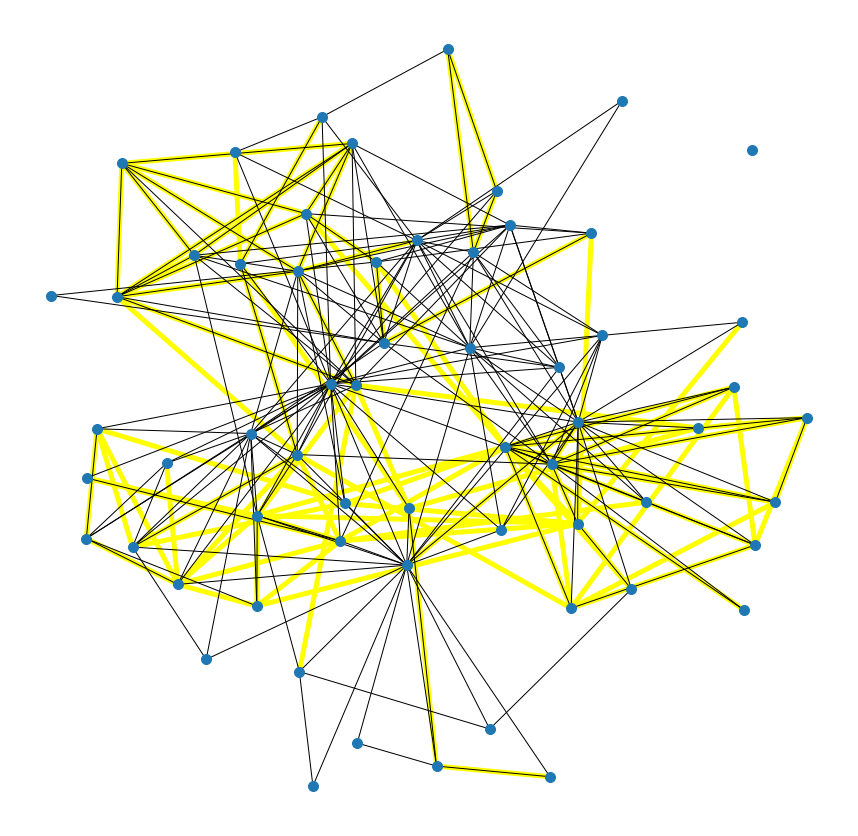

In [57]:
plt.figure(figsize =(15, 15))
nx.draw_networkx_nodes(CS, pos=posCS, node_size=100)
nx.draw_networkx_edges(CSls,pos=posCS, edge_color="yellow", width=5)
nx.draw_networkx_edges(CSw,pos=posCS, edge_color="black", width=1)
plt.box(False)
plt.show()

Which of the networks are connected? Which have connected component that is comparable their size?

Calculate the number of edges in each layer and overlap of the number of edges in each layer

In [60]:
#nx.is_connected(CSw)
#nx.is_connected(CSl)
#nx.is_connected(CSfb)
#nx.is_connected(CSca)
#nx.is_connected(CSls)

False

In [54]:
len(max(nx.connected_components(CSw), key=len))

60

In [61]:
len(max(nx.connected_components(CSfb), key=len))

32

In [62]:
len(max(nx.connected_components(CSls), key=len))

44

In [63]:
len(max(nx.connected_components(CSca), key=len))

6

In [64]:
len(max(nx.connected_components(CSl), key=len))

60

So lets look at work, leisure and lunch layer. Degree centrality for each of these layers and their correlations.

In [66]:
qcCSw=nx.degree_centrality(CSw)
qcCSls=nx.degree_centrality(CSls)
qcCSl=nx.degree_centrality(CSl)

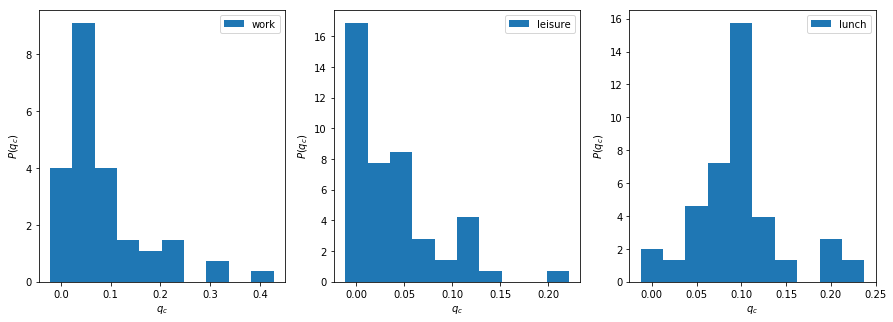

In [67]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.xlabel("$q_{c}$")
plt.ylabel('$P(q_{c})$')
plt.hist([v for v in qcCSw.values()], bins=10, density=True, histtype='bar',align='left',label="work")
plt.legend()

plt.subplot(1,3,2)
plt.xlabel("$q_{c}$")
plt.ylabel('$P(q_{c})$')
plt.hist([v for v in qcCSls.values()], bins=10, density=True, histtype='bar',align='left',label="leisure")
plt.legend()

plt.subplot(1,3,3)
plt.xlabel("$q_{c}$")
plt.ylabel('$P(q_{c})$')
plt.hist([v for v in qcCSl.values()], bins=10, density=True, histtype='bar',align='left',label="lunch")
plt.legend()

plt.show()

In [69]:
qcCS=nx.degree_centrality(CS)

In [70]:
a=[v for v in qcCS.values()]
b=[v for v in qcCSw.values()]
c=[v for v in qcCSl.values()]
d=[v for v in qcCSls.values()]
Cab=np.corrcoef(a,b)
Cac=np.corrcoef(a,c)
Cad=np.corrcoef(a,d)
Cbc=np.corrcoef(b,c)
Cbd=np.corrcoef(b,d)
Ccd=np.corrcoef(c,d)
C=np.array([[1,0,0,0],[np.around(Cab[0][1],2),1,0,0],[np.around(Cac[0][1],2),np.around(Cbc[0][1],2),1,0],[np.around(Cad[0][1],2),np.around(Cbd[0][1],2),np.around(Ccd[0][1],2),1]])


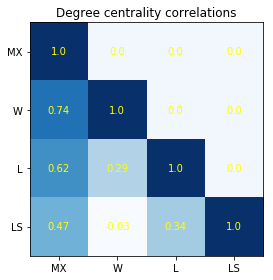

In [71]:
cc=['MX','W','L','LS']
fig, ax = plt.subplots()
im = ax.imshow(C, cmap="Blues")
ax.set_xticks(np.arange(len(cc)))
ax.set_yticks(np.arange(len(cc)))
ax.set_xticklabels(cc)
ax.set_yticklabels(cc)
for i in range(len(cc)):
    for j in range(len(cc)):
        text = ax.text(j, i, C[i, j],
                       ha="center", va="center", color="Yellow")

ax.set_title("Degree centrality correlations")
fig.tight_layout()
plt.show()
#fig.savefig("centrality_correlations.png")
plt.show()

Let us make subgraphs of connected components to check closeness centrality

In [73]:
CC_CSw=nx.subgraph(CS,max(nx.connected_components(CSw), key=len))
CC_CSl=nx.subgraph(CS,max(nx.connected_components(CSl), key=len))
CC_CSls=nx.subgraph(CS,max(nx.connected_components(CSls), key=len))

In [74]:
ccCSw=nx.closeness_centrality(CC_CSw)
ccCSl=nx.closeness_centrality(CC_CSl)
ccCSls=nx.closeness_centrality(CC_CSls)
ccCS=nx.closeness_centrality(CS)

We need to find the overlap of nodes that are involved in all three layers (they have at least one connection)

In [75]:
nd=[]
for u in CS.nodes():
    if u in CC_CSw.nodes() and u in CC_CSl.nodes() and u in CC_CSls.nodes():
        nd.append(u)
print(len(nd))

44


In [76]:
cc={}
ccw={}
ccl={}
ccls={}
for u in nd:
    cc[u]=ccCS[u]
    ccw[u]=ccCSw[u]
    ccl[u]=ccCSl[u]
    ccls[u]=ccCSls[u]

In [77]:
a=[v for v in cc.values()]
b=[v for v in ccw.values()]
c=[v for v in ccl.values()]
d=[v for v in ccls.values()]
Cab=np.corrcoef(a,b)
Cac=np.corrcoef(a,c)
Cad=np.corrcoef(a,d)
Cbc=np.corrcoef(b,c)
Cbd=np.corrcoef(b,d)
Ccd=np.corrcoef(c,d)
C=np.array([[1,0,0,0],[np.around(Cab[0][1],2),1,0,0],[np.around(Cac[0][1],2),np.around(Cbc[0][1],2),1,0],[np.around(Cad[0][1],2),np.around(Cbd[0][1],2),np.around(Ccd[0][1],2),1]])

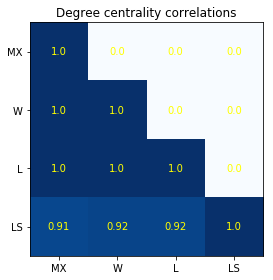

In [78]:
cm=['MX','W','L','LS']
fig, ax = plt.subplots()
im = ax.imshow(C, cmap="Blues")
ax.set_xticks(np.arange(len(cm)))
ax.set_yticks(np.arange(len(cm)))
ax.set_xticklabels(cm)
ax.set_yticklabels(cm)
for i in range(len(cm)):
    for j in range(len(cm)):
        text = ax.text(j, i, C[i, j],
                       ha="center", va="center", color="Yellow")

ax.set_title("Degree centrality correlations")
fig.tight_layout()
plt.show()
#fig.savefig("centrality_correlations.png")
plt.show()

What about betweenness centrality? Please calculate and plot.